In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

In [2]:
bj = pd.read_csv('../data/blkjckhands.csv')
bj.head(18)

,Unnamed: 0,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
0,0,Player1,7,10,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
1,1,Player2,10,9,0,0,0,19,10,8,...,0,0,18,nowin,Win,Plwin,Beat,20,0,19
2,2,Player3,9,8,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
3,3,Player4,2,10,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
4,4,Player5,10,2,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
5,5,Player6,6,1,8,10,0,25,10,8,...,0,0,18,nowin,Loss,Bust,PlBust,0,10,7
6,0,Player1,10,4,0,0,0,14,4,4,...,10,0,23,nowin,Win,DlBust,Bust,20,0,14
7,1,Player2,3,10,0,0,0,13,4,4,...,10,0,23,nowin,Win,DlBust,Bust,20,0,13
8,2,Player3,10,2,0,0,0,12,4,4,...,10,0,23,nowin,Win,DlBust,Bust,20,0,12
9,3,Player4,9,6,0,0,0,15,4,4,...,10,0,23,nowin,Win,DlBust,Bust,20,0,15


In [3]:
bj.shape

(900000, 21)

In [4]:
bj.dtypes

Unnamed: 0      int64
PlayerNo       object
card1           int64
card2           int64
card3           int64
card4           int64
card5           int64
sumofcards      int64
dealcard1       int64
dealcard2       int64
dealcard3       int64
dealcard4       int64
dealcard5       int64
sumofdeal       int64
blkjck         object
winloss        object
plybustbeat    object
dlbustbeat     object
plwinamt        int64
dlwinamt        int64
ply2cardsum     int64
dtype: object

In [41]:
(bj[bj['sumofdeal']==21].shape[0] / bj.shape[0]) * 100

12.04

In [26]:
bj[bj['blkjck']=='Win']['blkjck'].count()

43061

In [6]:
bj[(bj['blkjck']=='Win') & (bj['sumofdeal']!=21)]['blkjck'].count()

37985

In [7]:
bj[(bj['blkjck']=='Win') & (bj['sumofdeal']!=21)].groupby('PlayerNo').count()

,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,dealcard3,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
PlayerNo,,,,,,,,,,,,,,,,,,,
Player1,6303,6303,6303,6303,6303,6303,6303,6303,6303,6303,6303,6303,6303,6303,6303,6303,6303,6303,6303
Player2,6386,6386,6386,6386,6386,6386,6386,6386,6386,6386,6386,6386,6386,6386,6386,6386,6386,6386,6386
Player3,6308,6308,6308,6308,6308,6308,6308,6308,6308,6308,6308,6308,6308,6308,6308,6308,6308,6308,6308
Player4,6340,6340,6340,6340,6340,6340,6340,6340,6340,6340,6340,6340,6340,6340,6340,6340,6340,6340,6340
Player5,6319,6319,6319,6319,6319,6319,6319,6319,6319,6319,6319,6319,6319,6319,6319,6319,6319,6319,6319
Player6,6329,6329,6329,6329,6329,6329,6329,6329,6329,6329,6329,6329,6329,6329,6329,6329,6329,6329,6329


In [50]:
bj[(bj['blkjck']=='Win') & (bj['sumofdeal']!=21)].groupby('card1').count()

,Unnamed: 0,PlayerNo,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,dealcard3,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
card1,,,,,,,,,,,,,,,,,,,,
10,19069,19069,19069,19069,19069,19069,19069,19069,19069,19069,19069,19069,19069,19069,19069,19069,19069,19069,19069,19069
11,18916,18916,18916,18916,18916,18916,18916,18916,18916,18916,18916,18916,18916,18916,18916,18916,18916,18916,18916,18916


In [20]:
bj[(bj['blkjck']=='nowin')].groupby('card1').count()

,Unnamed: 0,PlayerNo,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,dealcard3,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
card1,,,,,,,,,,,,,,,,,,,,
1,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046
2,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611
3,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309
4,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112
5,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543
6,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236
7,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003
8,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864
9,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022


In [20]:
what_players_are_win_most = bj[bj['winloss']=='Win'].groupby('PlayerNo').count().reset_index()
what_players_are_win_most

,PlayerNo,Unnamed: 0,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
0,Player1,64396,64396,64396,64396,64396,64396,64396,64396,64396,...,64396,64396,64396,64396,64396,64396,64396,64396,64396,64396
1,Player2,64340,64340,64340,64340,64340,64340,64340,64340,64340,...,64340,64340,64340,64340,64340,64340,64340,64340,64340,64340
2,Player3,64305,64305,64305,64305,64305,64305,64305,64305,64305,...,64305,64305,64305,64305,64305,64305,64305,64305,64305,64305
3,Player4,64421,64421,64421,64421,64421,64421,64421,64421,64421,...,64421,64421,64421,64421,64421,64421,64421,64421,64421,64421
4,Player5,64106,64106,64106,64106,64106,64106,64106,64106,64106,...,64106,64106,64106,64106,64106,64106,64106,64106,64106,64106
5,Player6,64378,64378,64378,64378,64378,64378,64378,64378,64378,...,64378,64378,64378,64378,64378,64378,64378,64378,64378,64378


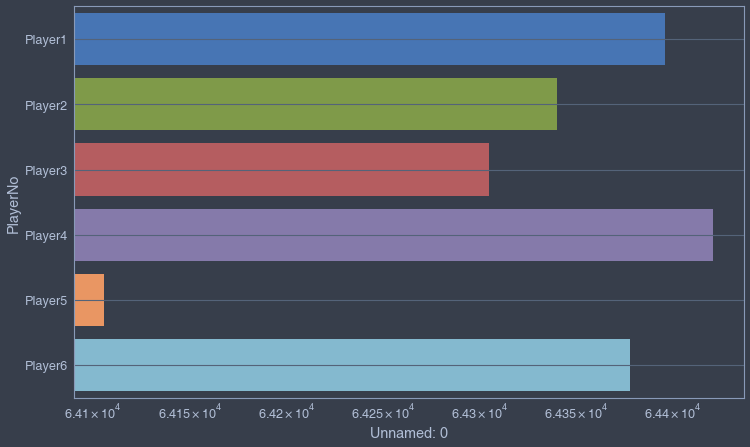

In [23]:
ax = sns.barplot(data=what_players_are_win_most, x='Unnamed: 0', y='PlayerNo')
ax.set_xscale('log')
ax.grid()

In [19]:
bj.groupby('card1').count()

,Unnamed: 0,PlayerNo,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,dealcard3,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
card1,,,,,,,,,,,,,,,,,,,,
1,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046,16046
2,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611,69611
3,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309,69309
4,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112,69112
5,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543,69543
6,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236,69236
7,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003,69003
8,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864,68864
9,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022,69022


In [36]:
_1st_game = bj.iloc[:6][['card1', 'card2', 'card3', 'card4', 'card5']]
_1st_game

,card1,card2,card3,card4,card5
0,7,10,0,0,0
1,10,9,0,0,0
2,9,8,0,0,0
3,2,10,0,5,0
4,10,2,0,5,0
5,6,1,8,10,0


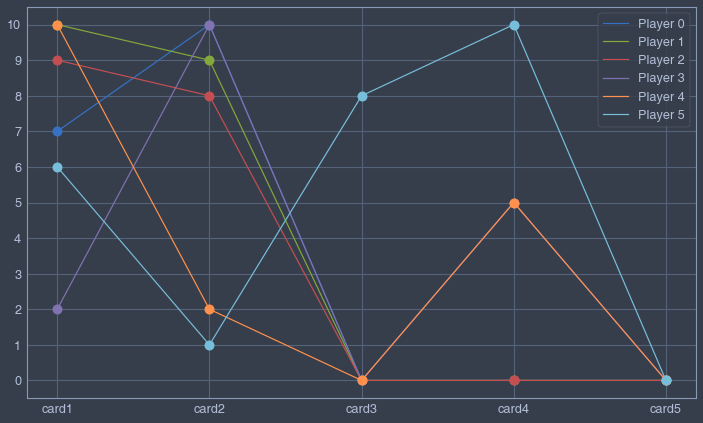

In [93]:
fig, ax = plt.subplots()

for i in range(_1st_game.shape[0]):
    ax.plot(_1st_game.iloc[i], label=f'Player {i}')
    for j in range(_1st_game.iloc[i].shape[0]):
        ax.plot(j, _1st_game.iloc[i][j], 'o', markersize=10, c=ax.get_lines()[-1].get_color())

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.yaxis.set_ticks(np.arange(0, 11));

In [22]:
sum_of_cards_that_win = bj[bj['winloss']=='Win'].groupby('sumofcards').count().reset_index()
sum_of_dealer_cards_that_win = bj[bj['dlbustbeat']=='Dlwin'].groupby('sumofdeal').count().reset_index()

<AxesSubplot:title={'center':'The Sum of Cards that Dealer had when Winning'}, xlabel='sumofdeal', ylabel='Unnamed: 0'>

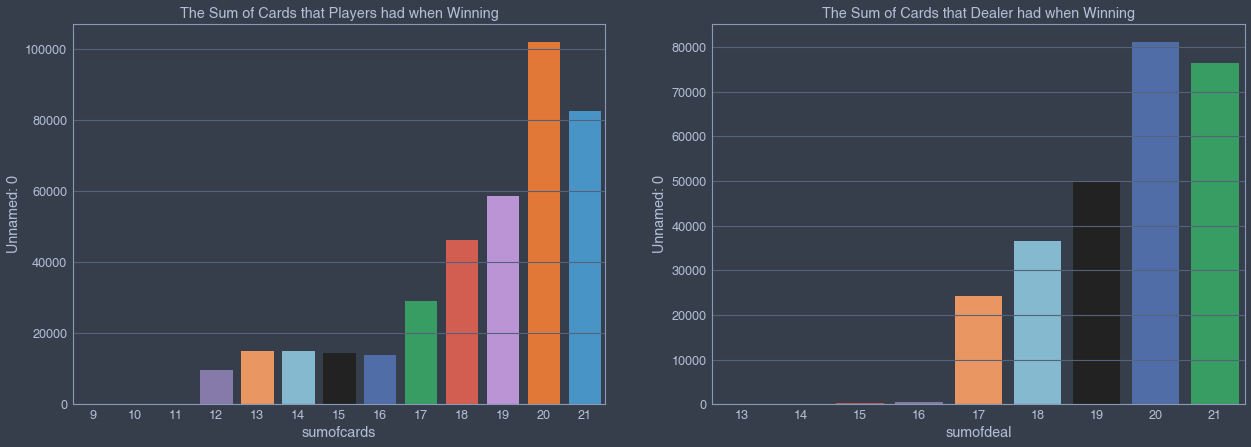

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(21, 7))

ax[0].set_title('The Sum of Cards that Players had when Winning')
ax[1].set_title('The Sum of Cards that Dealer had when Winning')

sns.barplot(data=sum_of_cards_that_win, x='sumofcards', y='Unnamed: 0', ax=ax[0])
sns.barplot(data=sum_of_dealer_cards_that_win, x='sumofdeal', y='Unnamed: 0', ax=ax[1])

In [48]:
bj[(bj['winloss']=='Win') & (bj['sumofcards']==9)]

,Unnamed: 0,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
18062,2,Player3,2,3,2,1,1,9,3,9,...,10,0,25,nowin,Win,DlBust,Bust,20,0,5
435910,4,Player5,2,2,2,2,1,9,8,7,...,0,0,25,nowin,Win,DlBust,Bust,20,0,4
828196,4,Player5,2,2,2,1,2,9,3,10,...,0,0,23,nowin,Win,DlBust,Bust,20,0,4
840883,1,Player2,2,2,2,2,1,9,11,2,...,1,7,23,nowin,Win,DlBust,Bust,20,0,4


In [15]:
cards = bj[(bj['card3']>0) & (bj['card4']>0) & (bj['card5']>0) & bj['dlbustbeat'].isin(['Beat', 'PLBust'])]
cards_when_dealer_win = bj[(bj['card3']>0) & (bj['card4']>0) & (bj['card5']>0) & (bj['dlbustbeat']=='Dlwin')]

<AxesSubplot:title={'center':'Sum of Cards. Players loss'}, xlabel='sumofcards', ylabel='Count'>

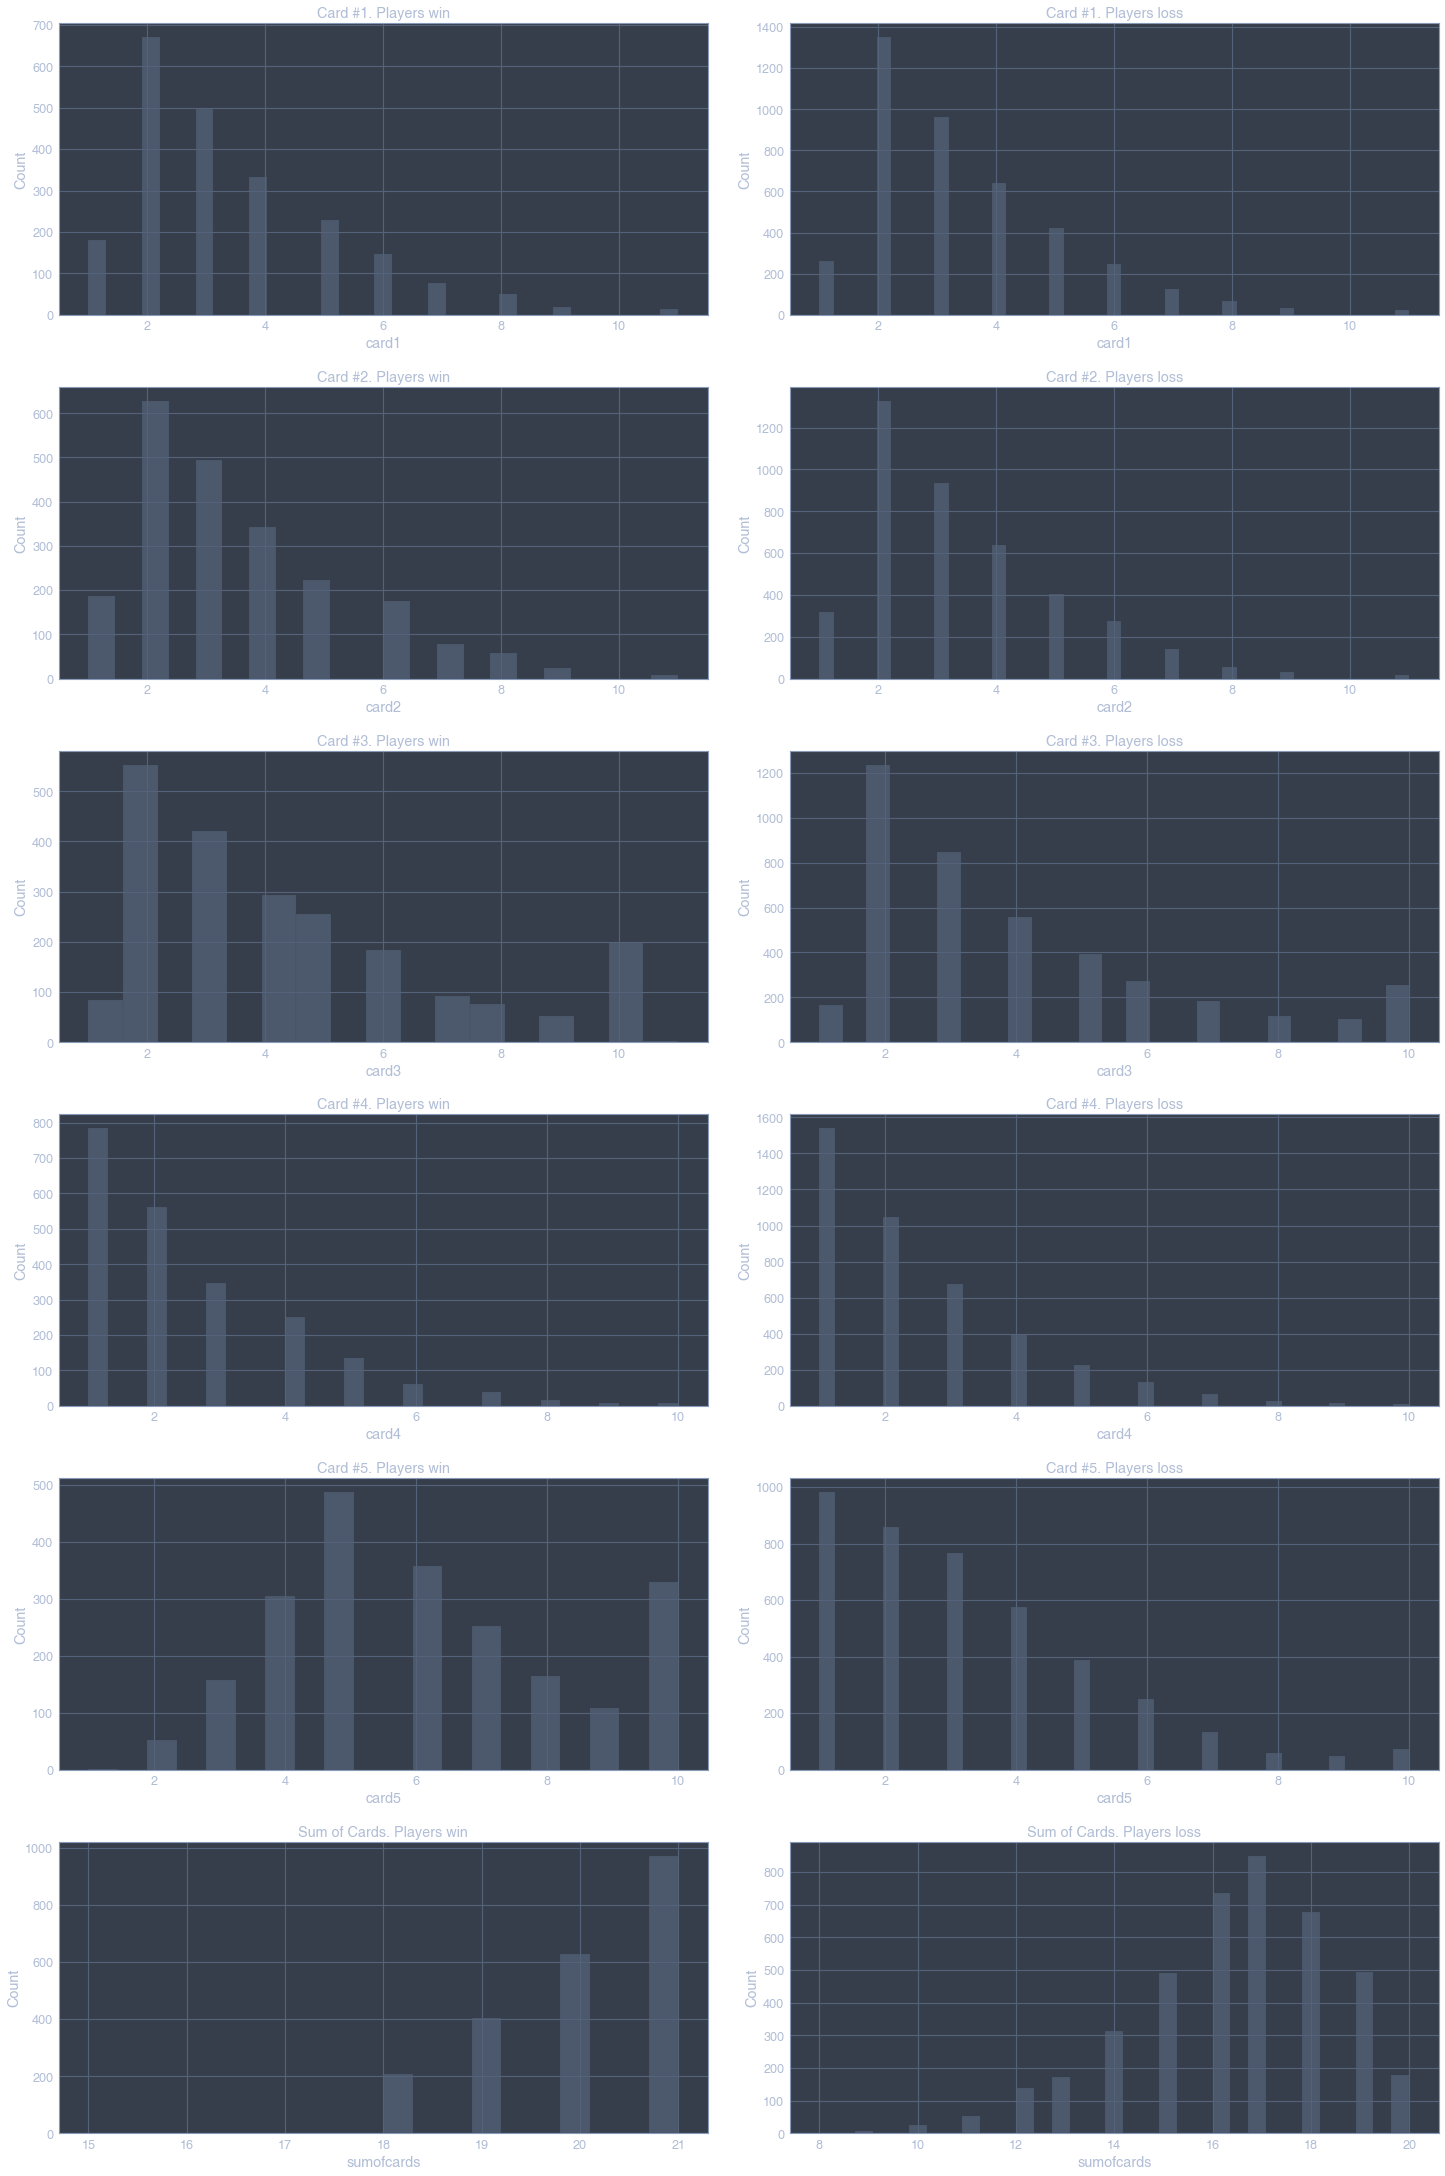

In [42]:
fig, ax = plt.subplots(6, 2, figsize=(21, 31))
fig.tight_layout(pad=5.0)

ax[0, 0].set_title('Card #1. Players win')
ax[0, 1].set_title('Card #1. Players loss')

ax[1, 0].set_title('Card #2. Players win')
ax[1, 1].set_title('Card #2. Players loss')

ax[2, 0].set_title('Card #3. Players win')
ax[2, 1].set_title('Card #3. Players loss')

ax[3, 0].set_title('Card #4. Players win')
ax[3, 1].set_title('Card #4. Players loss')

ax[4, 0].set_title('Card #5. Players win')
ax[4, 1].set_title('Card #5. Players loss')

ax[5, 0].set_title('Sum of Cards. Players win')
ax[5, 1].set_title('Sum of Cards. Players loss')

sns.histplot(data=cards, x='card1', ax=ax[0, 0])
sns.histplot(data=cards_when_dealer_win, x='card1', ax=ax[0, 1])

sns.histplot(data=cards, x='card2', ax=ax[1, 0])
sns.histplot(data=cards_when_dealer_win, x='card2', ax=ax[1, 1])

sns.histplot(data=cards, x='card3', ax=ax[2, 0])
sns.histplot(data=cards_when_dealer_win, x='card3', ax=ax[2, 1])

sns.histplot(data=cards, x='card4', ax=ax[3, 0])
sns.histplot(data=cards_when_dealer_win, x='card4', ax=ax[3, 1])

sns.histplot(data=cards, x='card5', ax=ax[4, 0])
sns.histplot(data=cards_when_dealer_win, x='card5', ax=ax[4, 1])

sns.histplot(data=cards, x='sumofcards', ax=ax[5, 0])
sns.histplot(data=cards_when_dealer_win, x='sumofcards', ax=ax[5, 1])

In [14]:
bj['cards'] = bj[['card1', 'card2', 'card3', 'card4', 'card5']].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
bj

,Unnamed: 0,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum,cards
0,0,Player1,7,10,0,0,0,17,10,8,...,0,18,nowin,Loss,Beat,Dlwin,0,10,17,"7,10,0,0,0"
1,1,Player2,10,9,0,0,0,19,10,8,...,0,18,nowin,Win,Plwin,Beat,20,0,19,"10,9,0,0,0"
2,2,Player3,9,8,0,0,0,17,10,8,...,0,18,nowin,Loss,Beat,Dlwin,0,10,17,"9,8,0,0,0"
3,3,Player4,2,10,0,5,0,17,10,8,...,0,18,nowin,Loss,Beat,Dlwin,0,10,12,"2,10,0,5,0"
4,4,Player5,10,2,0,5,0,17,10,8,...,0,18,nowin,Loss,Beat,Dlwin,0,10,12,"10,2,0,5,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,1,Player2,10,7,0,0,0,17,3,9,...,0,18,nowin,Loss,Beat,Dlwin,0,10,17,"10,7,0,0,0"
899996,2,Player3,6,1,10,0,0,17,3,9,...,0,18,nowin,Loss,Beat,Dlwin,0,10,7,"6,1,10,0,0"
899997,3,Player4,4,2,9,0,0,15,3,9,...,0,18,nowin,Loss,Beat,Dlwin,0,10,6,"4,2,9,0,0"
899998,4,Player5,9,10,0,0,0,19,3,9,...,0,18,nowin,Win,Plwin,Beat,20,0,19,"9,10,0,0,0"


In [18]:
bj[(bj['winloss']=='Win')].groupby('cards').count()

,Unnamed: 0,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
cards,,,,,,,,,,,,,,,,,,,,,
"1,1,10,0,0",160,160,160,160,160,160,160,160,160,160,...,160,160,160,160,160,160,160,160,160,160
"1,1,10,1,0",4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
"1,1,10,1,1",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"1,1,10,1,2",2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
"1,1,10,1,3",2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"9,7,0,3,0",131,131,131,131,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,131
"9,7,0,4,0",166,166,166,166,166,166,166,166,166,166,...,166,166,166,166,166,166,166,166,166,166
"9,7,0,5,0",190,190,190,190,190,190,190,190,190,190,...,190,190,190,190,190,190,190,190,190,190


In [37]:
cards_wl = bj.groupby(['cards', 'winloss']).count()['Unnamed: 0'].to_frame()
cards_wl = pd.pivot_table(cards_wl, index='cards', columns='winloss', values='Unnamed: 0')

cards_wl.fillna(0, inplace=True)
cards_wl

winloss,Loss,Push,Win
cards,,,
"1,1,10,0,0",237.0,0.0,160.0
"1,1,10,1,0",15.0,0.0,4.0
"1,1,10,1,1",3.0,0.0,1.0
"1,1,10,1,10",26.0,0.0,0.0
"1,1,10,1,2",0.0,0.0,2.0
...,...,...,...
"9,7,0,7,0",250.0,0.0,0.0
"9,7,0,8,0",256.0,0.0,0.0
"9,7,0,9,0",237.0,0.0,0.0


In [40]:
cards_wl = cards_wl.astype(int)

In [44]:
cards_wl[cards_wl['Win']>0].sort_values(by='Win', ascending=False)

winloss,Loss,Push,Win
cards,,,
"10,10,0,0,0",10082,14965,59501
"10,11,0,0,0",0,2597,19069
"11,10,0,0,0",0,2479,18916
"10,9,0,0,0",6285,2697,12327
"9,10,0,0,0",6393,2884,12034
...,...,...,...
"4,7,1,1,4",1,1,1
"4,7,1,2,6",0,0,1
"4,7,1,3,4",1,0,1
